<a href="https://colab.research.google.com/github/yt405099/clinical-heart-disease-visual-analysis/blob/main/clinical_heart_disease_visual_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Clinical Exploratory Data Analysis

Publication-style exploratory data analysis and clinical visualization of the UCI Heart Disease dataset.


## Introduction
This notebook explores clinical and demographic factors associated with heart disease using the UCI Heart Disease dataset.  
The focus is on interpretability and visual communication rather than predictive modeling.


## Dataset Overview
- Source: UCI Heart Disease (Cleveland subset)
- Observations: 303
- Variables: 14
- Outcome: `num` (binarized into no disease vs disease)


In [2]:
!git clone https://github.com/yt405099/clinical-heart-disease-visual-analysis.git

Cloning into 'clinical-heart-disease-visual-analysis'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 31 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 23.56 KiB | 11.78 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
!ls

clinical-heart-disease-visual-analysis	sample_data


In [4]:
!ls clinical-heart-disease-visual-analysis/data

heart_disease_uci.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Preprocessing
The dataset is loaded and minimally preprocessed, including type corrections and outcome binarization.  
Missing values are handled conservatively to preserve interpretability.


In [6]:
df = pd.read_csv("clinical-heart-disease-visual-analysis/data/heart_disease_uci.csv")
df.shape

(920, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
df.columns[df.isnull().any()]

Index(['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')

In [9]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [10]:
df.describe().T
# Switched rows and columns for reading purpose

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [11]:
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [12]:
df['target'] = (df['num'] >= 1).astype(int)

In [13]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[categorical_cols].nunique()

,0
sex,2
cp,4
fbs,2
restecg,3
exang,2
slope,3
ca,4
thal,3


## Patient Demographics
Basic demographic distributions are visualized to understand the baseline characteristics between patient group.


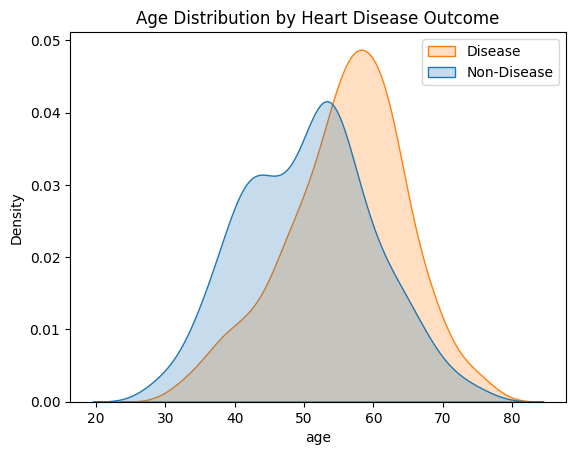

In [14]:
plt.figure()

sns.kdeplot(
    data=df,
    x='age',
    hue='target',
    fill=True,
    common_norm=False
)
plt.title('Age Distribution by Heart Disease Outcome')
plt.legend(['Disease', 'Non-Disease'])
plt.show()

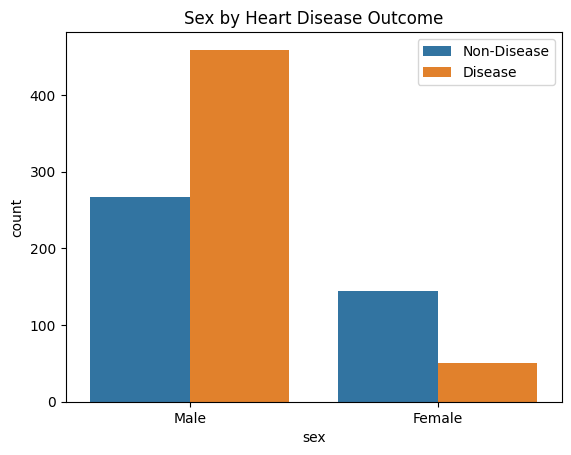

In [15]:
plt.figure()

ax = sns.countplot(
    data=df,
    x='sex',
    hue='target'
)

plt.title('Sex by Heart Disease Outcome')
plt.legend(['Non-Disease', 'Disease'])

# Clinical Measurements by Outcome



## Chest Pain Type and Heart Disease Outcome
We examine the distribution of chest pain types stratified by heart disease outcome.


Text(0.5, 0, 'Chest Pain Type')

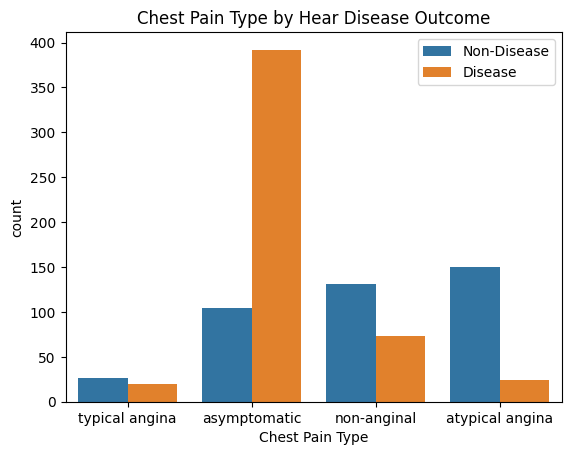

In [16]:
plt.figure()

sns.countplot(
    data=df,
    x='cp',
    hue='target'
)

plt.title('Chest Pain Type by Hear Disease Outcome')
plt.legend(['Non-Disease', 'Disease'])
plt.xlabel('Chest Pain Type')

**Observation:**  
Among patients with heart disease, asymptomatic chest pain is the most frequently
observed category in this dataset.

## Exercise-Induced Angina and Heart Disease Outcome

We will examin the presence of exercise-induced angina b/w patients with and without heart disease.

/tmp/ipython-input-1318585881.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


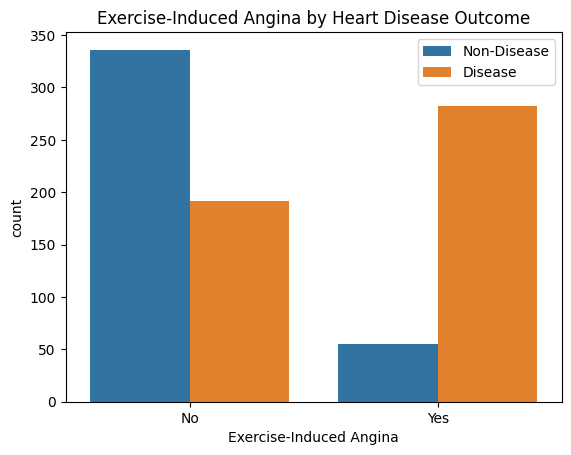

In [17]:
plt.figure()

ax = sns.countplot(
    data=df,
    x='exang',
    hue='target',
)

ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Exercise-Induced Angina')

plt.title('Exercise-Induced Angina by Heart Disease Outcome')
plt.legend(['Non-Disease', 'Disease'])

**Observation:**

Patients with heart disease show a higher propotion of exercise-induced angina compated to those without disease.

# Exercise-Related Measurements

## Maximum Heart Rate by Heart Disease Outcome
A KDE plot is used to compare the distribution of maximum heart rate achieved
between patients with and without heart disease.


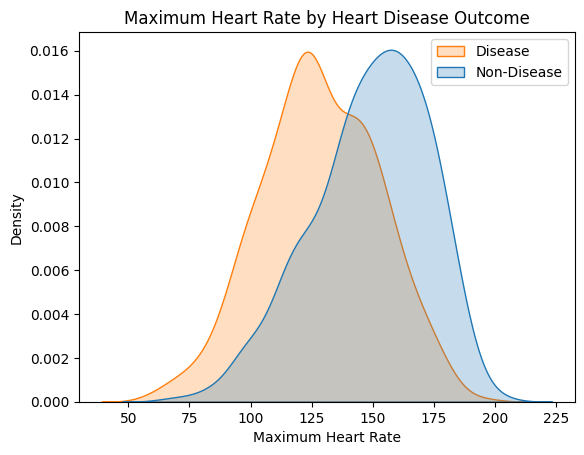

In [18]:
plt.figure()

ax = sns.kdeplot(
    data=df,
    x='thalch',
    hue='target',
    fill=True,
    common_norm=False
)

ax.set_xlabel('Maximum Heart Rate')

plt.title('Maximum Heart Rate by Heart Disease Outcome')
plt.legend(['Disease', 'Non-Disease'])

**Observation:**

People with heart disease tend to have difficulty reaching their maximum heart rate.

## ST Depression (Oldpeak) by Heart Disease Outcome
A box plot is used to compare the distribution and central tendency of ST
depression values b/w patients with and w/o heart disease.


/tmp/ipython-input-1481385875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipython-input-1481385875.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Disease', 'Disease'])


Text(0.5, 1.0, 'ST Depression by Heart Disease Outcome')

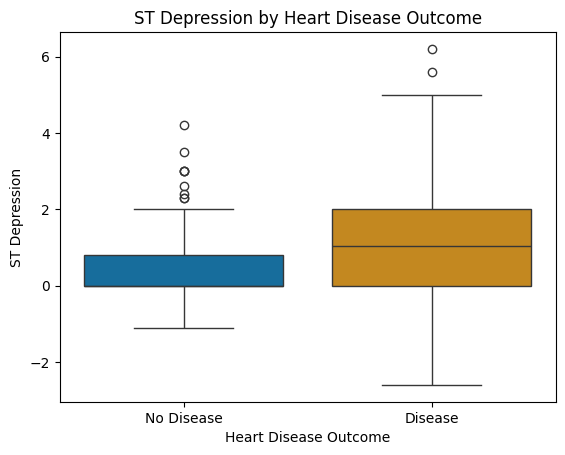

In [19]:
plt.figure()

ax = sns.boxplot(
    data=df,
    y='oldpeak',
    x='target',
    palette='colorblind'
)

ax.set_xticklabels(['No Disease', 'Disease'])
ax.set_xlabel('Heart Disease Outcome')
ax.set_ylabel('ST Depression')
plt.title('ST Depression by Heart Disease Outcome')

**Observation:**  
Patients with heart disease exhibit higher median oldpeak values and greater
variability compared to those without disease.


## ST Segment Slope and Heart Disease Outcome
A count plot is used to compare the distribution of ST segment slope categories
between patients with and without heart disease.


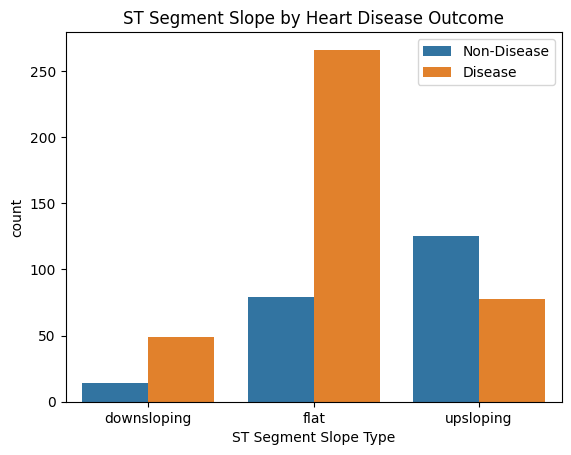

In [21]:
plt.figure()

ax = sns.countplot(
    data=df,
    x='slope',
    hue='target'
)


ax.set_xlabel('ST Segment Slope Type')
plt.title('ST Segment Slope by Heart Disease Outcome')
plt.legend(['Non-Disease', 'Disease'])


**Observation:**  
Patients with heart disease are more frequently associated with downsloping or
flat ST segments compared to those without disease.

#Structural / Diagnostic Indicators

## Number of Major Vessels and Heart Disease Outcome
A count plot is used to compare the distribution of patients across different
numbers of major vessels between disease and non-disease groups.


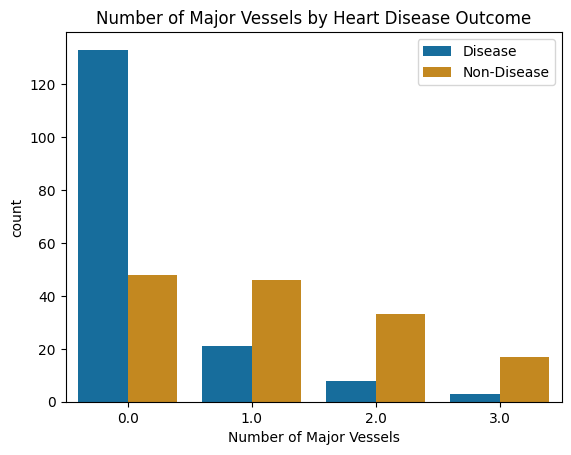

In [24]:
plt.figure()

ax = sns.countplot(
    data=df,
    x='ca',
    hue='target',
    palette='colorblind'
)

plt.title('Number of Major Vessels by Heart Disease Outcome')
plt.xlabel('Number of Major Vessels')
plt.legend(['Disease', 'Non-Disease'])

**Observation:**  
Patients with heart disease are more frequently observed in higher vessel count
categories compared to those without disease.


## Thalassemia Status and Heart Disease Outcome
A count plot is used to compare the distribution of diagnostic thal categories
between patients with and without heart disease.


Text(0.5, 0, 'Thalassemia Status')

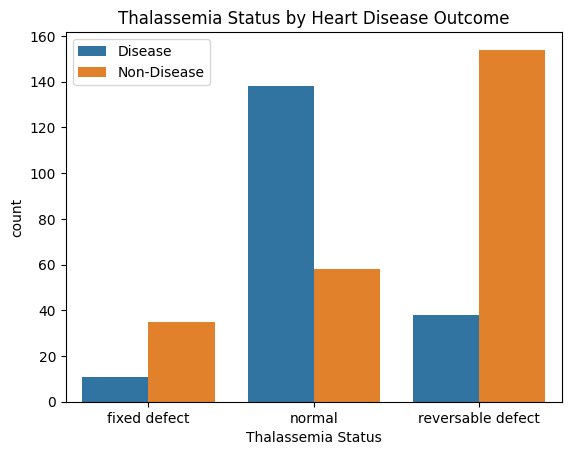

In [26]:
plt.figure()

ax = sns.countplot(
    data=df,
    x='thal',
    hue='target'
)

plt.title('Thalassemia Status by Heart Disease Outcome')
plt.legend(['Disease', 'Non-Disease'])
plt.xlabel('Thalassemia Status')

**Observation:**  
- Defect categories are more frequently associated with heart disease than normal category.
- Reversable defect is more associated with heart disease compare to fixed defect.


## Summary and Limitations
This analysis highlights how patient characteristics, clonical symptoms, exercise-related measurements, and diagnostic indicators are associated with heart disease presence, using visual comparisons.